In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Iris.csv')      #Reading Iris CSV file
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

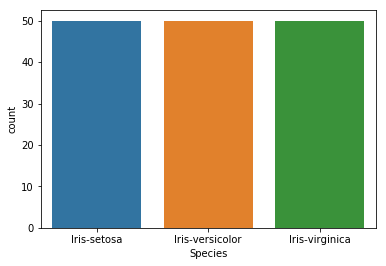

In [5]:
import seaborn as sb
sb.countplot(df['Species'],label="Count")   #or sb.countplot(x='Species',data=df)
plt.show()

In [6]:
df.drop('Id',inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

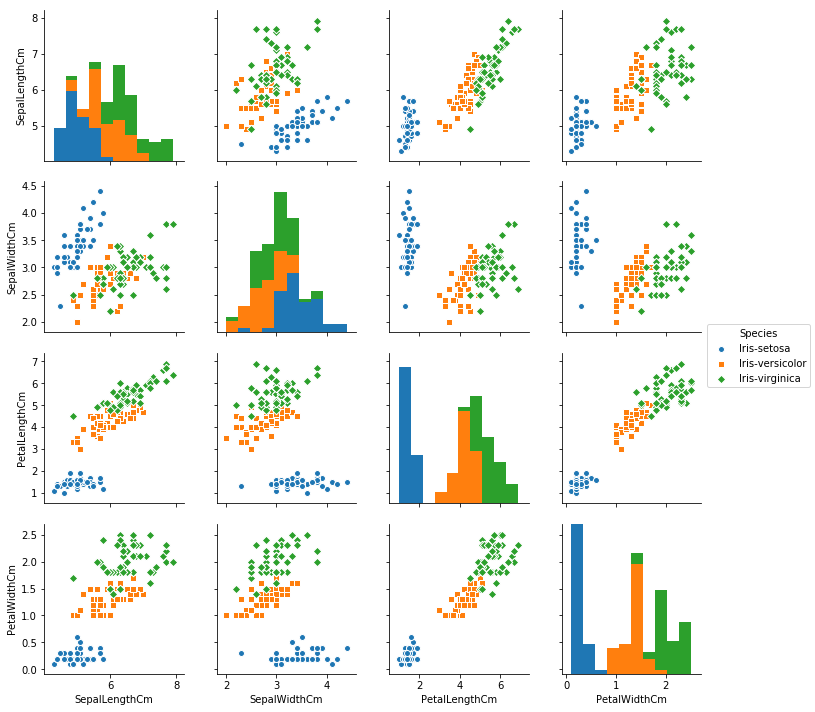

In [8]:
import seaborn as sb

g = sb.pairplot(df, hue='Species',markers=["o", "s", "D"])
plt.show()

                                   Pair-Plot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


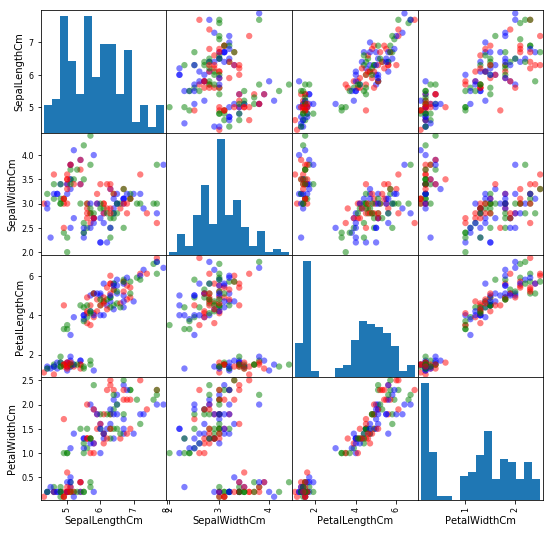

In [9]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=df[feature_names]
y=df['Species']
df.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
cmap=cm.get_cmap('gnuplot')
scatter=pd.scatter_matrix(x,c=['g','r','b'],marker='o',s=40,hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)

                        Scatter-matrix for each input variable

In [10]:
#Conversion of Categorical data into numeric data

dict={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df.replace({'Species':dict},inplace=True)

In [11]:
df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
#Spliting the dataset into a training set and a testing set

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

The following script performs feature scaling:

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [14]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier().fit(x_train,y_train)
print('Accuracy of K – Nearest Neighbour Classifier is {:.2f}' .format(model_KNN.score(x_test,y_test)))

Accuracy of K – Nearest Neighbour Classifier is 0.96


In [15]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression().fit(x_train,y_train)
print("Accuracy of Logistic Regression is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of Logistic Regression is 0.89


In [16]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier().fit(x_train,y_train)
print("Accuracy of Random Forest Classifier is {:.2f}" .format(model_rf.score(x_test,y_test)))

Accuracy of Random Forest Classifier is 0.96


In [17]:
#Support Vector Machine (SVM) Classifier

from sklearn.svm import SVC

model_svm=SVC().fit(x_train,y_train)
print("Accuracy of Support Vector Machine Classifier is {:.2f}" .format(model_svm.score(x_test,y_test)))

Accuracy of Support Vector Machine Classifier is 0.96


In [18]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier().fit(x_train,y_train)
print("Accuracy of Decision Tree Classifier is {:.2f}" .format(model_dt.score(x_test,y_test)))

Accuracy of Decision Tree Classifier is 0.96


In [19]:
#Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB().fit(x_train,y_train)
print("Accuracy of Gaussian Naive Bayes Classifier is {:.2f}" .format(model_gnb.score(x_test,y_test)))

Accuracy of Gaussian Naive Bayes Classifier is 0.93


In [21]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

model_ab=AdaBoostClassifier().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_ab.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is 0.93


In [22]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda=LinearDiscriminantAnalysis().fit(x_train,y_train)
print('Accuracy of Linear Discriminant Analysis is {:.2f}' .format(model_lda.score(x_test,y_test)))

Accuracy of Linear Discriminant Analysis is 0.96


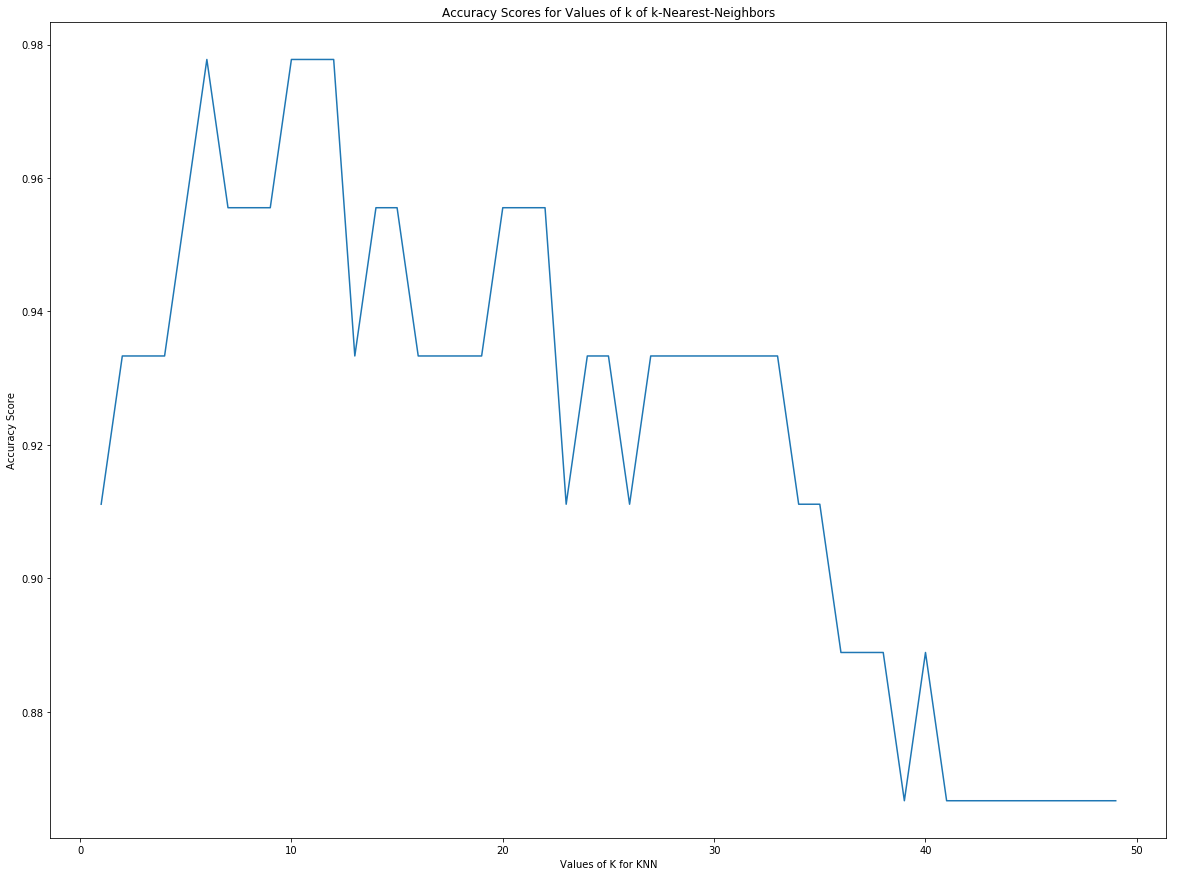

KNN gives Maximum Accuracy is 0.9777777777777777 and least value of K for maximum accuracy is 6


In [23]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

# experimenting with different k values on which KNN gives more accurate result
score=[]
k_range=range(1,50)
A_max=0
k_best=1

for k in k_range:
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    accu_knn=model_knn.score(x_test,y_test)
    score.append(accu_knn)
    if(A_max<accu_knn):
        A_max=accu_knn
        k_best=k

plt.figure(figsize=(20, 15))
plt.plot(k_range,score)
plt.xlabel('Values of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
 
print('KNN gives Maximum Accuracy is {0} and least value of K for maximum accuracy is {1}' .format(A_max,k_best))